In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_csv("/content/AirPassengers.csv")

In [3]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Parse strings to datatime type
dataset['Month'] = pd.to_datetime(dataset['Month'])


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df = dataset.set_index(['Month'])

In [8]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


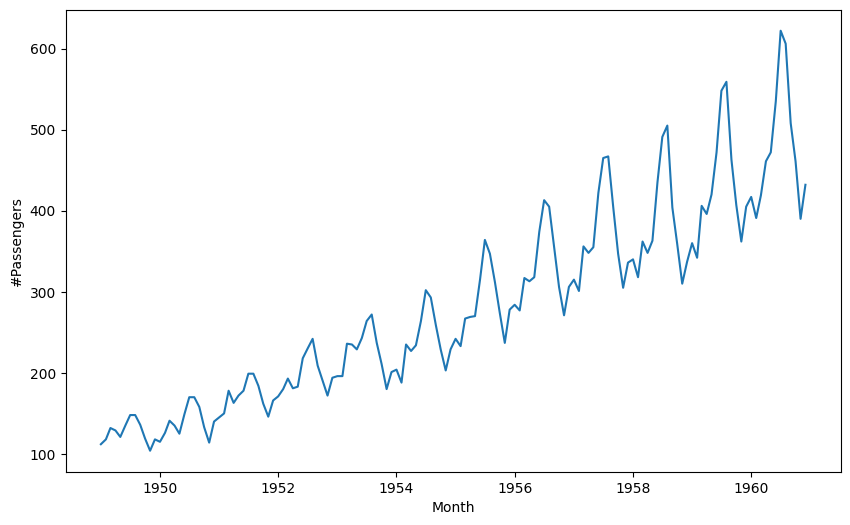

In [9]:
## plot graph

## df.plot()

plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.plot(df)

In [10]:
#### classical decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
decomposition = seasonal_decompose(df['#Passengers'])

<Figure size 1000x600 with 0 Axes>

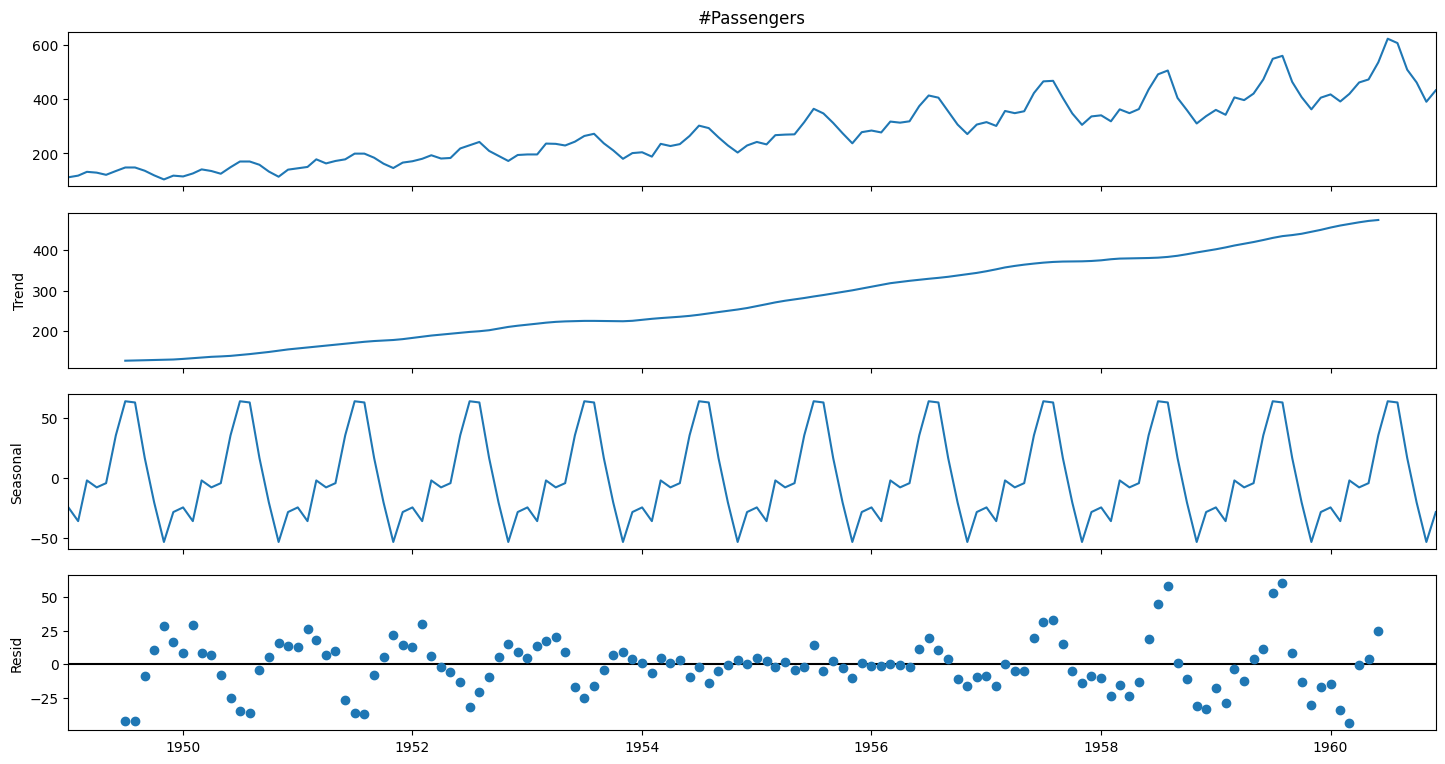

In [12]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)

In [13]:
# Determing rolling statistics

rolmean = df.rolling(window=12).mean()

rolstd = df.rolling(window=12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


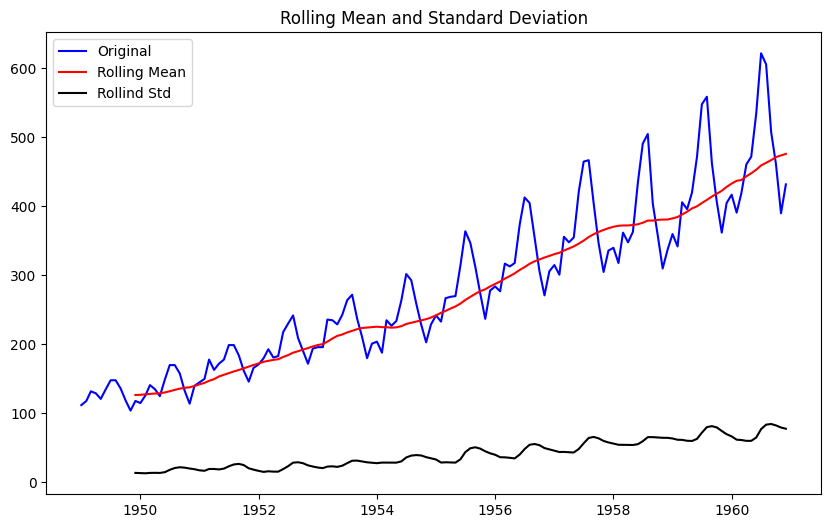

In [14]:
#Plot rolling statistics
orig = plt.plot(df, color = 'blue',label='Original')
mean = plt.plot(rolmean,color = 'red',label='Rolling Mean')
std = plt.plot(rolstd,color = 'black',label = 'Rollind Std')
plt.legend(loc="best")
plt.title('Rolling Mean and Standard Deviation')
plt.show(block = False)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adf_check(time_series):
    result=adfuller(time_series)
    print('Augmented Dickey fuller test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [16]:
## Perform Dickey-Fuller test:

#def adf_test(series):
    #result=adfuller(series)
    #print('ADF Statistics: {}'.format(result[0]))
    #print('p- value: {}'.format(result[1]))
   # if result[1] <= 0.05:
        #print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
   # else:
        #print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
result = adf_check(df['#Passengers'])


Augmented Dickey fuller test:
ADF Test Statistic : 0.8153688792060498
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
df['#Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

<Axes: xlabel='Month'>

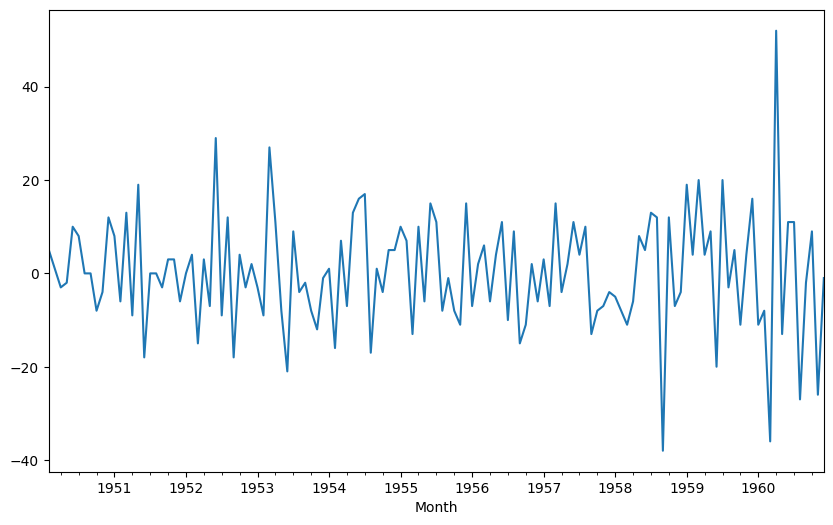

In [19]:
seasonality_removed=df['#Passengers']-df['#Passengers'].shift(12)## seasonal differencing
trend_seasonality_removed = seasonality_removed - seasonality_removed.shift(1)# normal differencing
trend_seasonality_removed = trend_seasonality_removed.dropna()
trend_seasonality_removed.plot()


In [ ]:
# d=1,D=1

In [21]:
### Autocorrelation and Partial auto correaltion plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

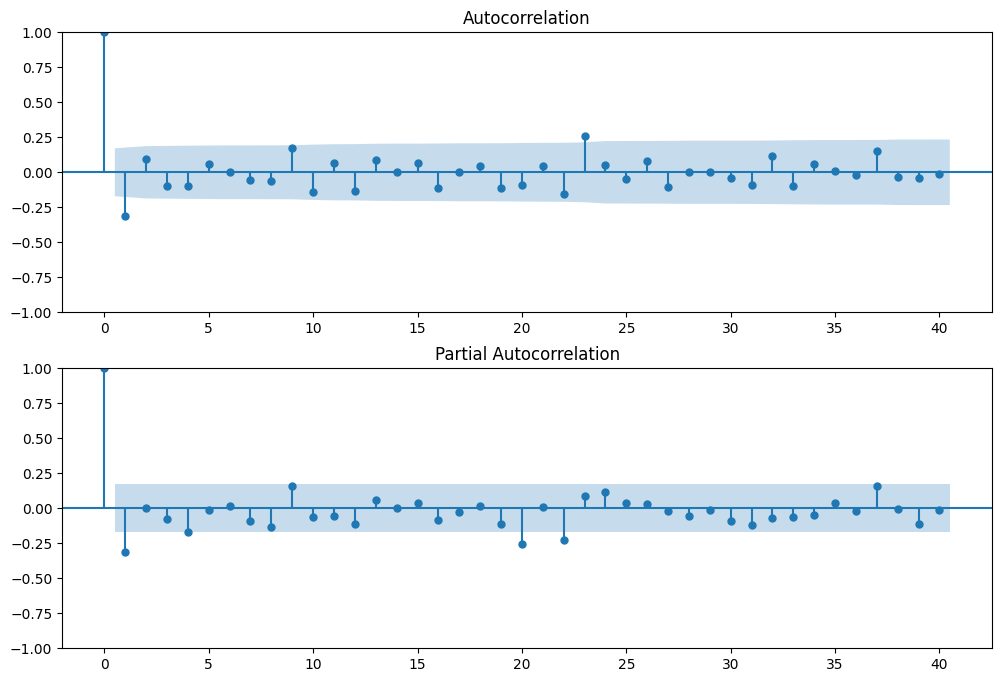

In [22]:
fig = plt.figure(figsize =(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trend_seasonality_removed,lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(trend_seasonality_removed,lags=40,ax=ax2)

In [23]:
### split train and test data
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [24]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [25]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [26]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [27]:
pred_start_date


Timestamp('1956-01-01 00:00:00')

In [28]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [29]:
test_data

,#Passengers
Month,
1956-01-01,284
1956-02-01,277
1956-03-01,317
1956-04-01,313
1956-05-01,318
1956-06-01,374
1956-07-01,413
1956-08-01,405
1956-09-01,355


In [30]:
train_data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1955-08-01,347
1955-09-01,312
1955-10-01,274


## **SARIMAX**

In [31]:
import statsmodels.api as sm

In [32]:
model = sm.tsa.statespace.SARIMAX(df['#Passengers'],
                                  order = (3,1,1),
                                  seasonal_order = (0,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
results = model.fit()


In [34]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -503.848
Date:                            Mon, 08 Apr 2024   AIC                           1019.696
Time:                                    07:50:01   BIC                           1036.947
Sample:                                01-01-1949   HQIC                          1026.706
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6135      0.087      7.015      0.000       0.442       0.785
ar.L2          0.2403      0.134   

In [35]:
results.fittedvalues

Month
1949-01-01      0.000000
1949-02-01    111.997514
1949-03-01    118.000416
1949-04-01    131.998662
1949-05-01    129.000085
                 ...    
1960-08-01    623.898180
1960-09-01    513.197544
1960-10-01    449.425179
1960-11-01    410.809723
1960-12-01    437.937691
Length: 144, dtype: float64

<Axes: xlabel='Month'>

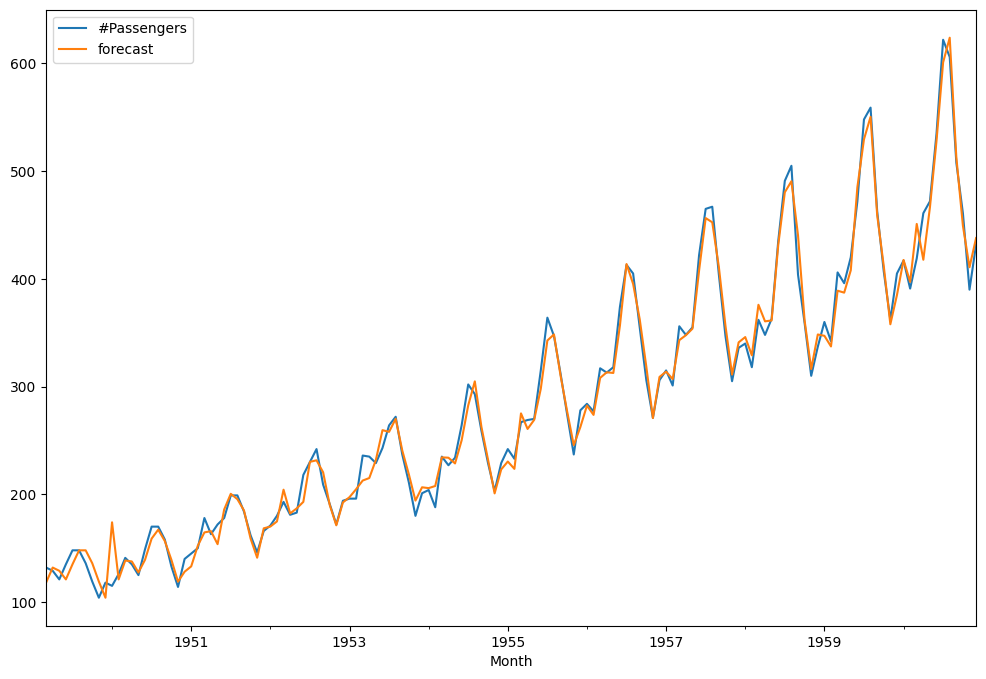

In [36]:
### forecast

df['forecast'] = results.fittedvalues

temp_df = df.iloc[2:,:]
temp_df[['#Passengers','forecast']].plot(figsize = (12,8))


In [37]:
results.forecast(12)  ### forecast for future 12 dates

1961-01-01    444.372154
1961-02-01    420.852690
1961-03-01    453.268461
1961-04-01    490.725121
1961-05-01    503.651696
1961-06-01    566.288525
1961-07-01    652.341467
1961-08-01    639.561987
1961-09-01    542.050967
1961-10-01    494.445029
1961-11-01    426.327958
1961-12-01    468.409240
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
################# Hyper Paramater tuning ############

p = range(0,4) #p = [0, 1, 2, 3]
d = [1] # d = 1
q = range(0,4) # q= [0,1,2,3]

P = range(0,2) # P = [0,1]
D = [1]
Q = range(0,2) # Q = [0,1]

freq=12

In [39]:
import itertools

list(itertools.product(p, d, q))

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [40]:
import itertools
import warnings

# Define the p, d and q parameters to take any value between 0 and 2
p = range(0,4)
q = range(0,4) ## experiment with p [0,1,2,3,4], q = [0,1,2,3,4]
d = [1]

seasonal_p = range(0,2)
seasonal_q = range(0,2)
seasonal_d = [1]
frequency=[12]

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))  ####output = [(0,1,0), (0,1,1), (0,1,2)]

seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, frequency))  ###output= [(0,1,0,12), (0,1,1,12)]


# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,4), range(1,3), range(0,3)))]

print('Examples of parameter combinations for Seasonal ARIMA...')

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['#Passengers'],
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit()

            print('SARIMA{}x{}12 - MAPE:{}'.format(param, param_seasonal, mape(df['#Passengers'], results.fittedvalues)))
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...


In [41]:
forecasted_values = results.forecast(12)

In [42]:
df = pd.concat([df, pd.DataFrame(forecasted_values)], axis=1)

In [43]:
df.rename(columns ={'predicted_mean': 'forecasts'}, inplace=True)

In [44]:
df

,#Passengers,forecast,forecasts
1949-01-01,112.0,0.000000,NaN
1949-02-01,118.0,111.997514,NaN
1949-03-01,132.0,118.000416,NaN
1949-04-01,129.0,131.998662,NaN
1949-05-01,121.0,129.000085,NaN
...,...,...,...
1961-08-01,NaN,NaN,638.072415
1961-09-01,NaN,NaN,549.366218
1961-10-01,NaN,NaN,498.937654
1961-11-01,NaN,NaN,427.078026


<Axes: >

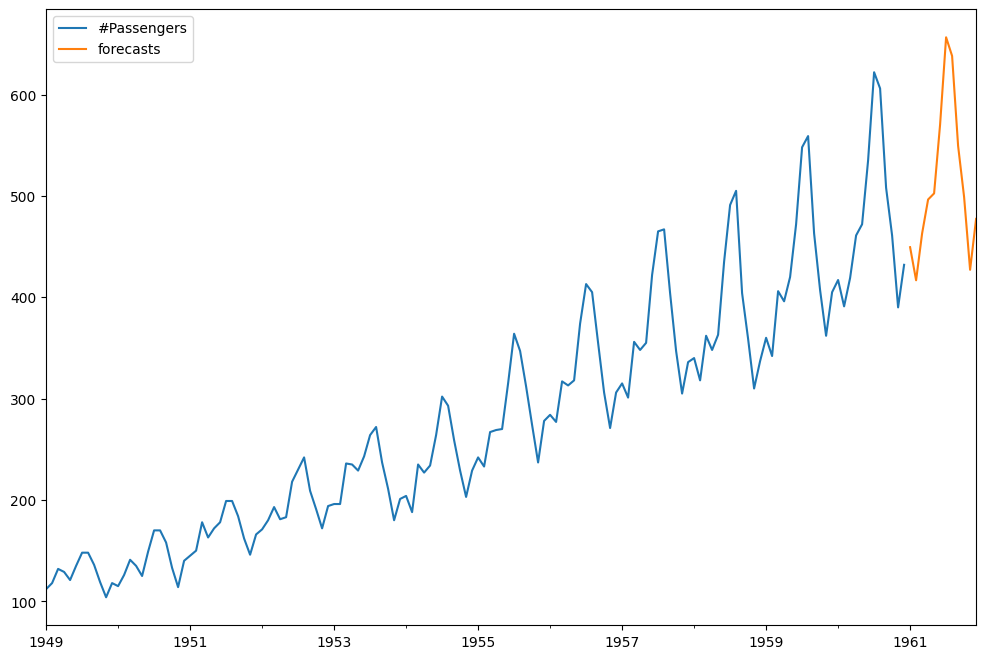

In [45]:
df[['#Passengers','forecasts']].plot(figsize = (12, 8))

In [46]:
df.tail()

,#Passengers,forecast,forecasts
1961-08-01,NaN,NaN,638.072415
1961-09-01,NaN,NaN,549.366218
1961-10-01,NaN,NaN,498.937654
1961-11-01,NaN,NaN,427.078026
1961-12-01,NaN,NaN,477.332405


In [47]:
results.predict(start= 168, end = 180,dynamic = True)

1963-01-01    528.050955
1963-02-01    488.694348
1963-03-01    540.996787
1963-04-01    574.330731
1963-05-01    574.406958
1963-06-01    650.674893
1963-07-01    734.417771
1963-08-01    710.499665
1963-09-01    628.023222
1963-10-01    575.778323
1963-11-01    498.983978
1963-12-01    554.828796
1964-01-01    567.014228
Freq: MS, Name: predicted_mean, dtype: float64

In [48]:
from pandas.tseries.offsets import DateOffset

In [49]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,14)]

In [50]:
future_dates

[Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00')]

In [51]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [52]:
future_df = pd.concat([df,future_dates_df])

In [53]:
future_df.tail(20)

,#Passengers,forecast,forecasts
1961-06-01,NaN,NaN,570.455683
1961-07-01,NaN,NaN,656.489032
1961-08-01,NaN,NaN,638.072415
1961-09-01,NaN,NaN,549.366218
1961-10-01,NaN,NaN,498.937654
1961-11-01,NaN,NaN,427.078026
1961-12-01,NaN,NaN,477.332405
1962-01-01,NaN,NaN,NaN
1962-02-01,NaN,NaN,NaN
1962-03-01,NaN,NaN,NaN


<Axes: >

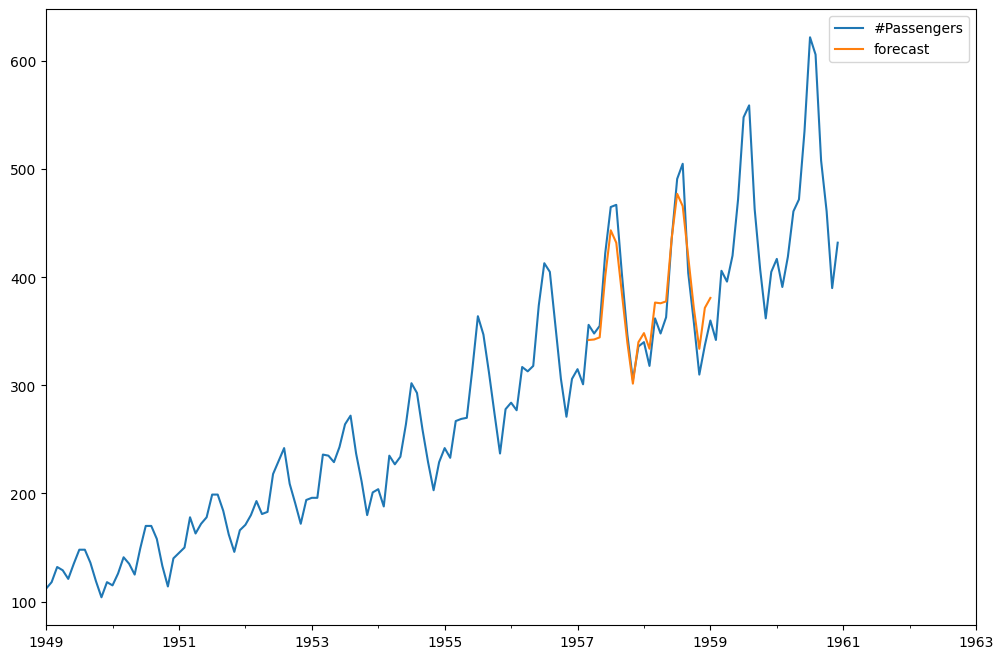

In [55]:
future_df['forecast'] = results.predict(start = 98, end = 120,dynamic= True)
future_df[['#Passengers', 'forecast']].plot(figsize = (12, 8))